# Tarea N°3 Visualización de la Información

Nombre estudiante: Sofía Vits Contreras

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from flexitext import flexitext
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle

## Análisis exploratorio del dataset

En esta sección revisaré el dataset y realizaré gráficos para verificar el tipo de gráfico más adecuado para representar los datos seleccionados

In [2]:
inscritos = pd.read_csv("ArchivoB_Adm2024.csv", delimiter = ';')

In [3]:
inscritos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306497 entries, 0 to 306496
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID_aux                      306497 non-null  object 
 1   ANYO_PROCESO                306497 non-null  int64  
 2   FECHA_NACIMIENTO            306497 non-null  int64  
 3   RBD                         301597 non-null  float64
 4   COD_ENS                     301597 non-null  float64
 5   REGIMEN                     276895 non-null  float64
 6   RAMA_EDUCACIONAL            301597 non-null  object 
 7   GRUPO_DEPENDENCIA           301597 non-null  float64
 8   ANYO_EGRESO                 306297 non-null  float64
 9   CODIGO_REGION               303240 non-null  float64
 10  CODIGO_PROVINCIA            303240 non-null  float64
 11  CODIGO_COMUNA               301597 non-null  float64
 12  CODIGO_REGION_D             306497 non-null  int64  
 13  CODIGO_COMUNA_

In [4]:
inscritos.head()

,ID_aux,ANYO_PROCESO,FECHA_NACIMIENTO,RBD,COD_ENS,REGIMEN,RAMA_EDUCACIONAL,GRUPO_DEPENDENCIA,ANYO_EGRESO,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,BEA,PACE,PAIS_NACIMIENTO,SEXO,INGRESO_PERCAPITA_GRUPO_FA
0,id_5846558574617,2024,12006,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,210,1,1
1,id_9063590676377,2024,72005,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,210,2,3
2,id_9653596675339,2024,122005,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,BEA,PACE,210,1,6
3,id_096902947324,2024,52004,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,244,1,99
4,id_9610596071061,2024,112005,1.0,510.0,3.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,NaN,NaN,210,1,99


In [5]:
inscritos = inscritos.drop(columns=['ANYO_PROCESO', 'FECHA_NACIMIENTO', 'RBD', 'BEA', 'PACE', 'REGIMEN'])

In [6]:
inscritos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306497 entries, 0 to 306496
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID_aux                      306497 non-null  object 
 1   COD_ENS                     301597 non-null  float64
 2   RAMA_EDUCACIONAL            301597 non-null  object 
 3   GRUPO_DEPENDENCIA           301597 non-null  float64
 4   ANYO_EGRESO                 306297 non-null  float64
 5   CODIGO_REGION               303240 non-null  float64
 6   CODIGO_PROVINCIA            303240 non-null  float64
 7   CODIGO_COMUNA               301597 non-null  float64
 8   CODIGO_REGION_D             306497 non-null  int64  
 9   CODIGO_COMUNA_D             306497 non-null  int64  
 10  SITUACION_EGRESO            306497 non-null  int64  
 11  PAIS_NACIMIENTO             306497 non-null  int64  
 12  SEXO                        306497 non-null  int64  
 13  INGRESO_PERCAP

In [7]:
inscritos.isna().sum()/(len(inscritos))*100

ID_aux                        0.000000
COD_ENS                       1.598711
RAMA_EDUCACIONAL              1.598711
GRUPO_DEPENDENCIA             1.598711
ANYO_EGRESO                   0.065253
CODIGO_REGION                 1.062653
CODIGO_PROVINCIA              1.062653
CODIGO_COMUNA                 1.598711
CODIGO_REGION_D               0.000000
CODIGO_COMUNA_D               0.000000
SITUACION_EGRESO              0.000000
PAIS_NACIMIENTO               0.000000
SEXO                          0.000000
INGRESO_PERCAPITA_GRUPO_FA    0.000000
dtype: float64

In [8]:
inscritos = inscritos.dropna()

In [9]:
inscritos.isna().sum()

ID_aux                        0
COD_ENS                       0
RAMA_EDUCACIONAL              0
GRUPO_DEPENDENCIA             0
ANYO_EGRESO                   0
CODIGO_REGION                 0
CODIGO_PROVINCIA              0
CODIGO_COMUNA                 0
CODIGO_REGION_D               0
CODIGO_COMUNA_D               0
SITUACION_EGRESO              0
PAIS_NACIMIENTO               0
SEXO                          0
INGRESO_PERCAPITA_GRUPO_FA    0
dtype: int64

In [10]:
inscritos.duplicated().sum()

np.int64(0)

In [11]:
inscritos['RAMA_EDUCACIONAL'].unique()

array(['T2', 'T3', 'H1', 'H2', 'T1', 'T4', 'T5'], dtype=object)

In [12]:
inscritos['RAMA_EDUCACIONAL'].value_counts()

RAMA_EDUCACIONAL
H1    206194
T2     29492
T1     23938
T3     21390
H2     16869
T4      3106
T5       608
Name: count, dtype: int64

In [13]:
inscritos['GRUPO_DEPENDENCIA'].unique()

array([4., 2., 1., 3.])

In [14]:
inscritos['GRUPO_DEPENDENCIA'].value_counts()

GRUPO_DEPENDENCIA
2.0    163051
3.0     93446
1.0     32215
4.0     12885
Name: count, dtype: int64

In [15]:
inscritos['ANYO_EGRESO'].unique()

array([2023., 2021., 2022., 2009., 2014., 2020., 2016., 2011., 2019.,
       2013., 2005., 2017., 2010., 2015., 2018., 2001., 2012., 1999.,
       2008., 2003., 2000., 2004., 1997., 2002., 1994., 2006., 2007.,
       1988., 1991., 1989., 1995., 1993., 1996., 1986., 1981., 1998.,
       1990., 1982., 1992., 1983., 1984., 1987., 1985.])

In [16]:
inscritos['ANYO_EGRESO'].value_counts()

ANYO_EGRESO
2023.0    201241
2022.0     54035
2021.0     17581
2020.0      8664
2019.0      5451
2018.0      3513
2017.0      2427
2016.0      1734
2015.0      1347
2014.0       967
2013.0       783
2012.0       629
2011.0       513
2010.0       474
2009.0       354
2008.0       297
2007.0       243
2005.0       212
2006.0       204
2004.0       164
2003.0       133
2002.0       110
2001.0        81
2000.0        61
1999.0        49
1998.0        37
1996.0        34
1993.0        31
1994.0        31
1997.0        29
1995.0        24
1988.0        21
1990.0        20
1992.0        20
1991.0        17
1989.0        13
1986.0        11
1982.0        11
1984.0         8
1987.0         7
1981.0         6
1983.0         5
1985.0         5
Name: count, dtype: int64

In [17]:
inscritos['CODIGO_REGION'].unique()

array([15.,  1.,  2.,  3.,  4.,  5.,  6.,  7., 16.,  8.,  9., 14., 10.,
       11., 12., 13.])

In [18]:
inscritos['CODIGO_REGION'].value_counts()

CODIGO_REGION
13.0    116106
5.0      30419
8.0      28526
7.0      19316
9.0      17910
6.0      16462
4.0      14094
10.0     13844
2.0       9859
16.0      8728
14.0      6705
1.0       5909
3.0       4647
15.0      4471
12.0      2546
11.0      2055
Name: count, dtype: int64

In [19]:
inscritos['PAIS_NACIMIENTO'].unique()

array([210, 244, 123, 143, 290,   0, 163, 126, 156, 182, 221, 250, 164,
       109, 231, 243, 101, 999, 155, 154, 150, 170, 286, 141, 192, 152,
       102, 158, 238, 142, 103, 183])

In [20]:
inscritos['PAIS_NACIMIENTO'].value_counts()

PAIS_NACIMIENTO
210    276394
0       12713
290      4350
244      2398
143      1850
123      1493
182       781
156       496
109       347
155       155
126        77
163        60
152        60
101        58
164        46
286        43
141        43
999        39
243        38
221        37
142        15
192        14
150        12
250        11
158        11
102        10
231         9
103         9
238         8
154         7
170         7
183         6
Name: count, dtype: int64

In [21]:
inscritos['COD_ENS'].unique()

array([510., 610., 310., 363., 410., 710., 810., 563., 463., 663., 910.,
       763.])

In [22]:
inscritos['COD_ENS'].value_counts()

COD_ENS
310.0    206194
510.0     29308
410.0     23876
610.0     21083
363.0     16869
710.0      3076
810.0       608
663.0       190
563.0       184
910.0       117
463.0        62
763.0        30
Name: count, dtype: int64

In [23]:
inscritos['SEXO'].value_counts()

SEXO
2    162052
1    139545
Name: count, dtype: int64

In [24]:
inscritos['INGRESO_PERCAPITA_GRUPO_FA'].value_counts()

INGRESO_PERCAPITA_GRUPO_FA
99    77844
1     48709
2     34999
3     24107
4     19621
8     19484
7     18252
6     16942
5     14673
10    13850
9     13116
Name: count, dtype: int64

In [25]:
#Ajuste necesario para reemplazar código numérico
inscritos['SEXO'] = inscritos['SEXO'].astype(str)

In [26]:
inscritos['SEXO'] = inscritos['SEXO'].str.replace("1","Hombre")
inscritos['SEXO'] = inscritos['SEXO'].str.replace("2","Mujer")

In [27]:
inscritos.head(10)

,ID_aux,COD_ENS,RAMA_EDUCACIONAL,GRUPO_DEPENDENCIA,ANYO_EGRESO,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,PAIS_NACIMIENTO,SEXO,INGRESO_PERCAPITA_GRUPO_FA
0,id_5846558574617,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,1
1,id_9063590676377,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Mujer,3
2,id_9653596675339,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,6
3,id_096902947324,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,244,Hombre,99
4,id_9610596071061,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,99
5,id_9726597872673,510.0,T2,4.0,2021.0,15.0,151.0,15101.0,15,15101,5,210,Hombre,99
6,id_9543595874361,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Mujer,1
7,id_5880558478050,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,8
8,id_4017540971786,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,123,Hombre,6
9,id_9095590479500,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,1


In [28]:
inscritos['SEXO'].value_counts()

SEXO
Mujer     162052
Hombre    139545
Name: count, dtype: int64

In [29]:
inscritos.head()

,ID_aux,COD_ENS,RAMA_EDUCACIONAL,GRUPO_DEPENDENCIA,ANYO_EGRESO,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,PAIS_NACIMIENTO,SEXO,INGRESO_PERCAPITA_GRUPO_FA
0,id_5846558574617,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,1
1,id_9063590676377,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Mujer,3
2,id_9653596675339,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,6
3,id_096902947324,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,244,Hombre,99
4,id_9610596071061,510.0,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,99


In [30]:
#Ajuste necesario para reemplazar código numérico
inscritos['COD_ENS'] = inscritos['COD_ENS'].astype(str)

In [31]:
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("310.0","H-C Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("510.0","T-P Industrial Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("410.0","T-P Comercial Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("610.0","T-P Técnica Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("363.0","H-C Adultos")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("710.0","T-P Agrícola Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("810.0","T-P Marítima Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("663.0","T-P Técnica Adultos")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("563.0","T-P Industrial Adultos")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("910.0","Artística Jóvenes")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("463.0","T-P Comercial Adultos")
inscritos['COD_ENS'] = inscritos['COD_ENS'].str.replace("763.0","T-P Agrícola Adultos")

In [32]:
inscritos.head()

,ID_aux,COD_ENS,RAMA_EDUCACIONAL,GRUPO_DEPENDENCIA,ANYO_EGRESO,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,PAIS_NACIMIENTO,SEXO,INGRESO_PERCAPITA_GRUPO_FA
0,id_5846558574617,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,1
1,id_9063590676377,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Mujer,3
2,id_9653596675339,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,6
3,id_096902947324,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,244,Hombre,99
4,id_9610596071061,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,99


In [33]:
inscritos['COD_ENS'].unique()

array(['T-P Industrial Jóvenes', 'T-P Técnica Jóvenes', 'H-C Jóvenes',
       'H-C Adultos', 'T-P Comercial Jóvenes', 'T-P Agrícola Jóvenes',
       'T-P Marítima Jóvenes', 'T-P Industrial Adultos',
       'T-P Comercial Adultos', 'T-P Técnica Adultos',
       'Artística Jóvenes', 'T-P Agrícola Adultos'], dtype=object)

In [34]:
from sklearn.preprocessing import normalize

def normalize_rows(df):
    df = pd.DataFrame(normalize(df, norm='l1'), index=df.index, columns=df.columns)
    return df

def normalize_columns(df):
    df = pd.DataFrame(normalize(df, norm='l1', axis=0), index=df.index, columns=df.columns)
    return df



In [35]:
#Crea tabla base para heatmap con datos normalizados
establecimientos_sexo = (
    inscritos.groupby(['COD_ENS','SEXO'])
        .agg(n_inscritos=('SEXO', 'count'))
    ['n_inscritos'].unstack(fill_value=0)
    .pipe(normalize_rows)
)

establecimientos_sexo.head(12)

SEXO,Hombre,Mujer
COD_ENS,,
Artística Jóvenes,0.470085,0.529915
H-C Adultos,0.478214,0.521786
H-C Jóvenes,0.453529,0.546471
T-P Agrícola Adultos,0.966667,0.033333
T-P Agrícola Jóvenes,0.538036,0.461964
T-P Comercial Adultos,0.306452,0.693548
T-P Comercial Jóvenes,0.378204,0.621796
T-P Industrial Adultos,0.913043,0.086957
T-P Industrial Jóvenes,0.756142,0.243858


In [36]:
#Crea tabla base para heatmap con datos normalizados
establecimientos_sexo_base = (
    inscritos.groupby(['COD_ENS','SEXO'])
        .agg(n_inscritos=('SEXO', 'count'))
    ['n_inscritos'].unstack(fill_value=0)
)

establecimientos_sexo_base.head(12)

SEXO,Hombre,Mujer
COD_ENS,,
Artística Jóvenes,55,62
H-C Adultos,8067,8802
H-C Jóvenes,93515,112679
T-P Agrícola Adultos,29,1
T-P Agrícola Jóvenes,1655,1421
T-P Comercial Adultos,19,43
T-P Comercial Jóvenes,9030,14846
T-P Industrial Adultos,168,16
T-P Industrial Jóvenes,22161,7147


In [37]:
#Transforma valores a porcentaje
establecimientos_sexo = establecimientos_sexo[establecimientos_sexo.select_dtypes(include=['number']).columns] * 100

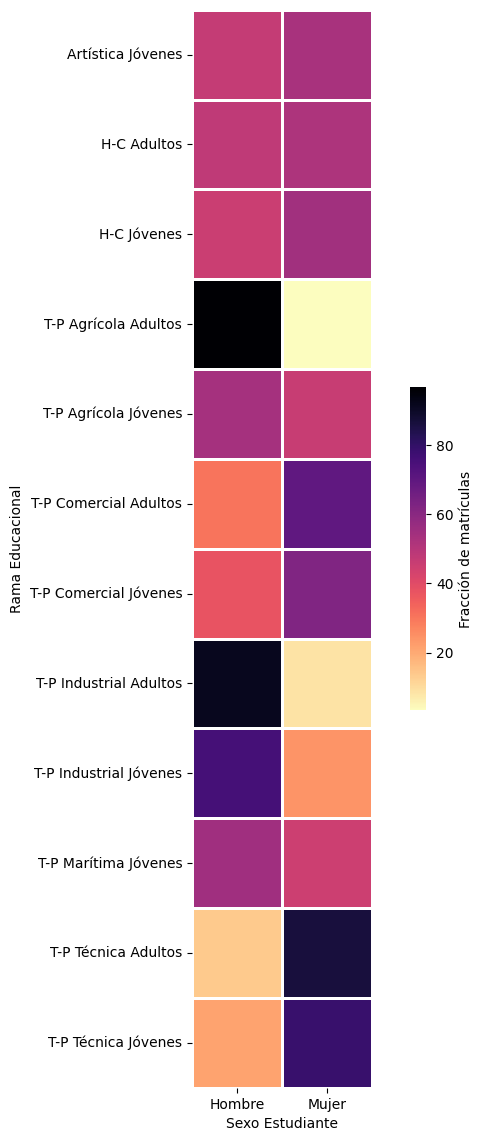

In [38]:
#Borrador heatmap final
plt.figure(figsize=(10, 14))
sns.heatmap(establecimientos_sexo, cmap='magma_r', square=True, linewidths=1, 
            cbar_kws={'shrink': 0.3, 'label': 'Fracción de matrículas'})
plt.xlabel('Sexo Estudiante')
plt.ylabel('Rama Educacional')
plt.show()

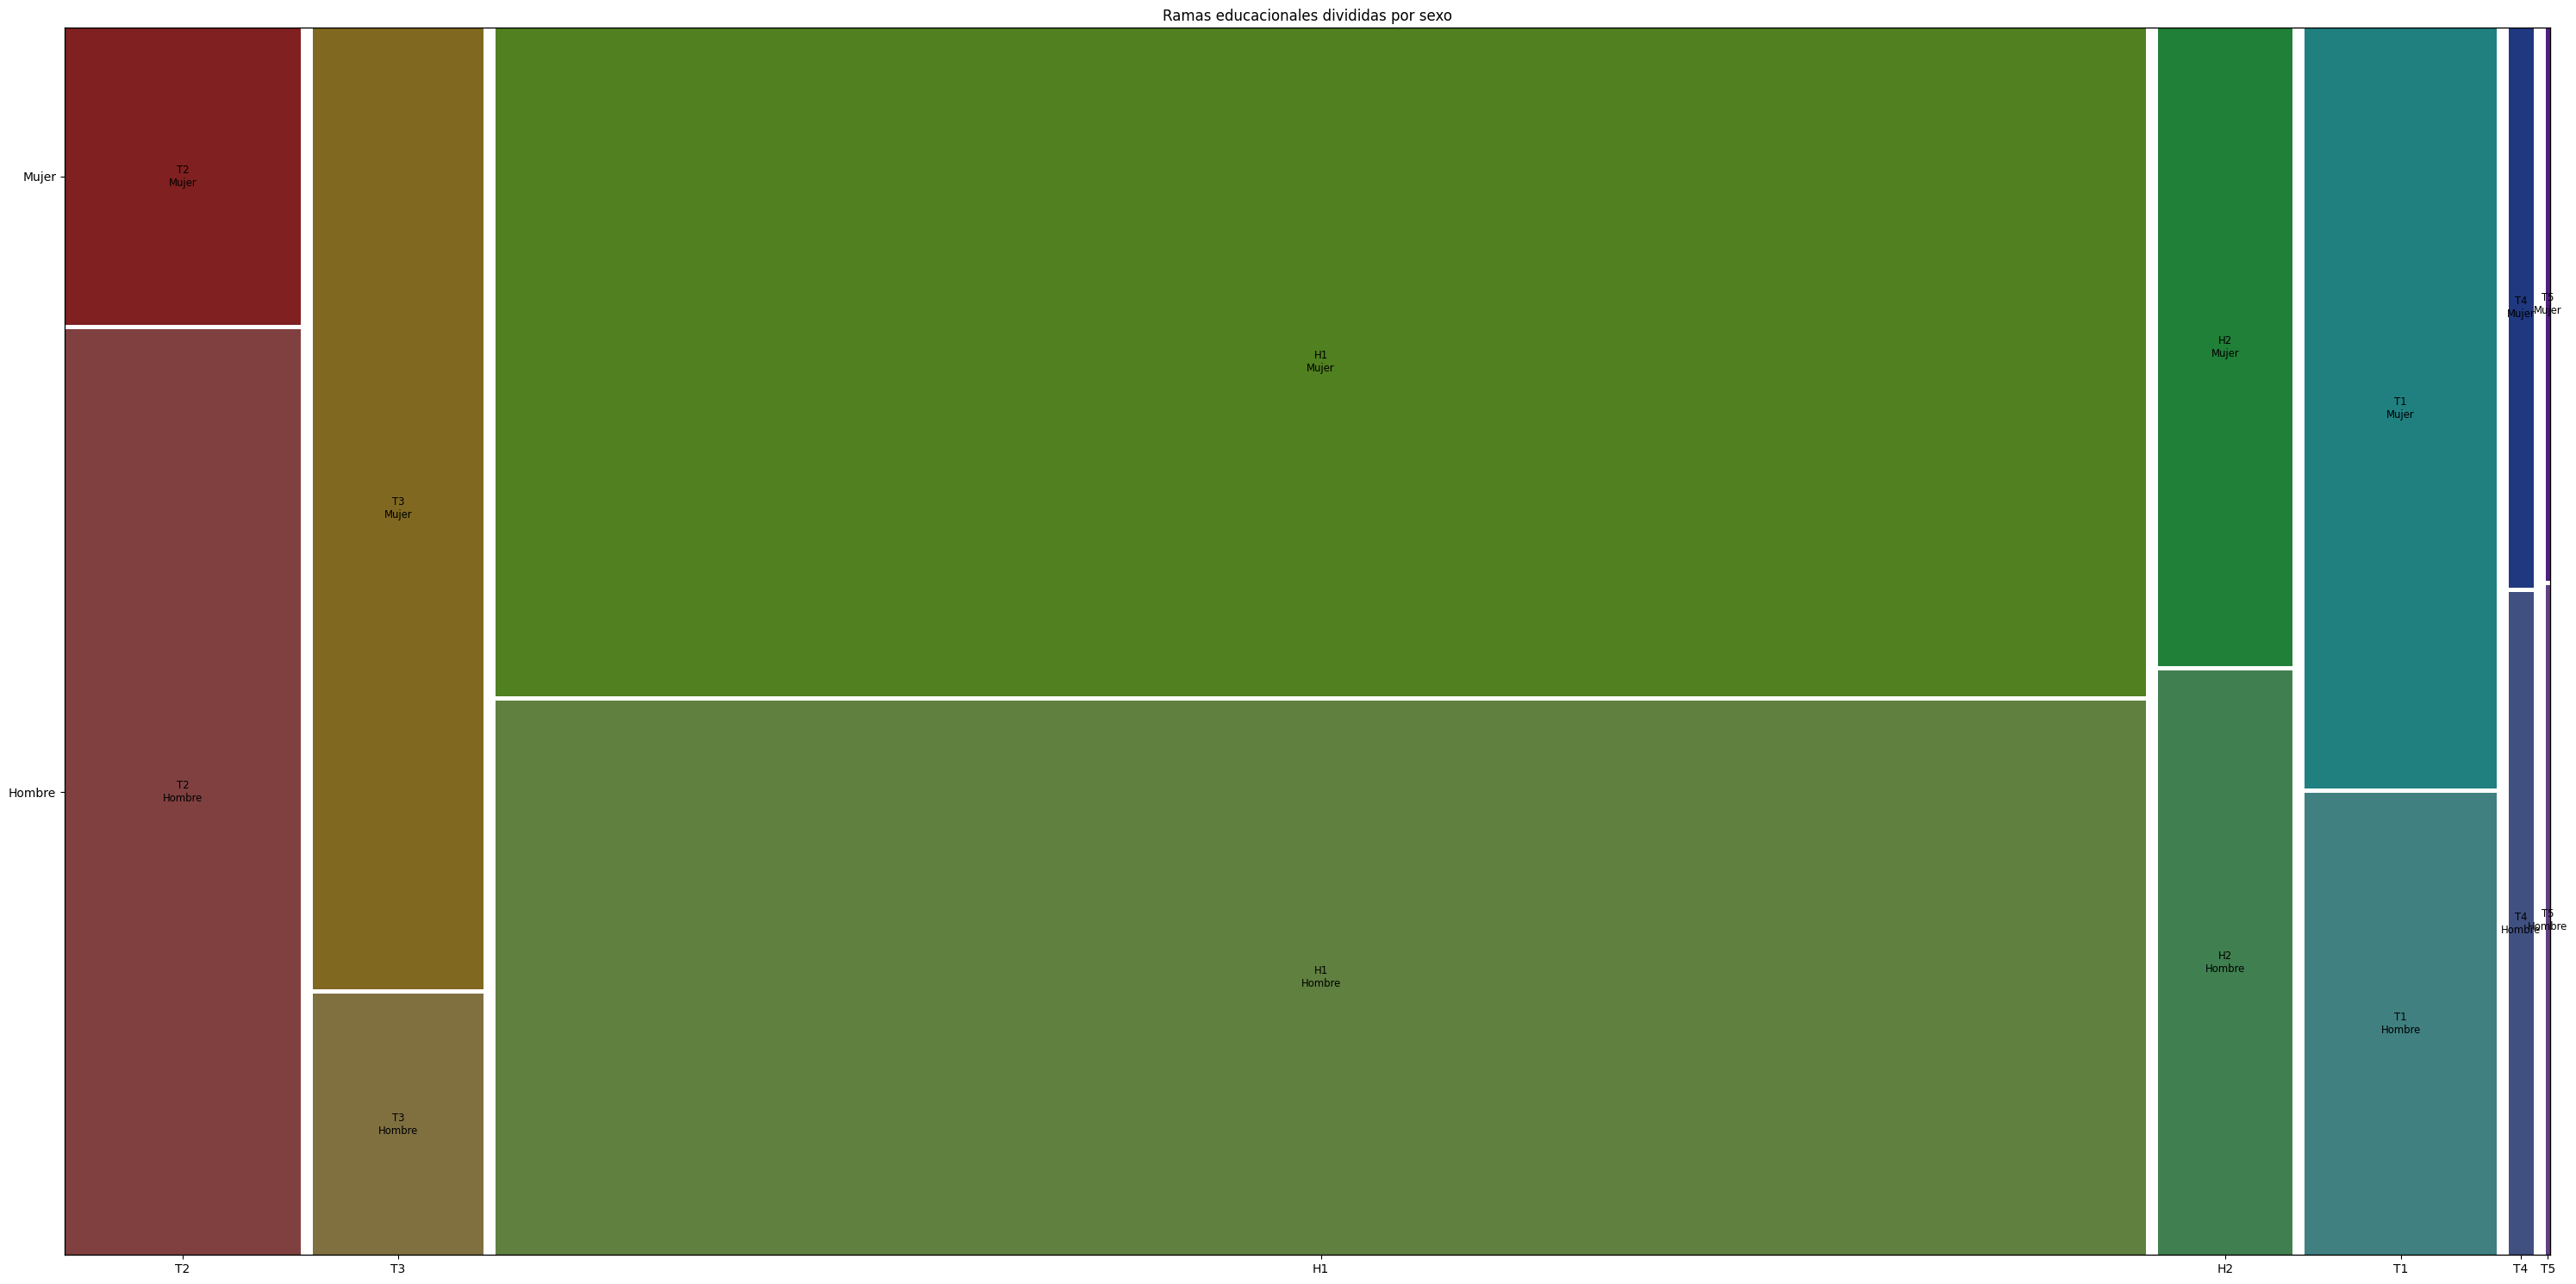

In [39]:
#Prueba mosaico
plt.rcParams["figure.figsize"] = [30.00, 15.00]
plt.rcParams["figure.autolayout"] = True
mosaic(inscritos, ['RAMA_EDUCACIONAL', 'SEXO'], title='Ramas educacionales divididas por sexo')
plt.show()

In [40]:
#Dataframe colegios técnicos
H_C = ['H1', 'H2']
TP_sexo = inscritos.query('RAMA_EDUCACIONAL not in @H_C')

In [41]:
TP_sexo.head()

,ID_aux,COD_ENS,RAMA_EDUCACIONAL,GRUPO_DEPENDENCIA,ANYO_EGRESO,CODIGO_REGION,CODIGO_PROVINCIA,CODIGO_COMUNA,CODIGO_REGION_D,CODIGO_COMUNA_D,SITUACION_EGRESO,PAIS_NACIMIENTO,SEXO,INGRESO_PERCAPITA_GRUPO_FA
0,id_5846558574617,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,1
1,id_9063590676377,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Mujer,3
2,id_9653596675339,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,6
3,id_096902947324,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,244,Hombre,99
4,id_9610596071061,T-P Industrial Jóvenes,T2,4.0,2023.0,15.0,151.0,15101.0,15,15101,1,210,Hombre,99


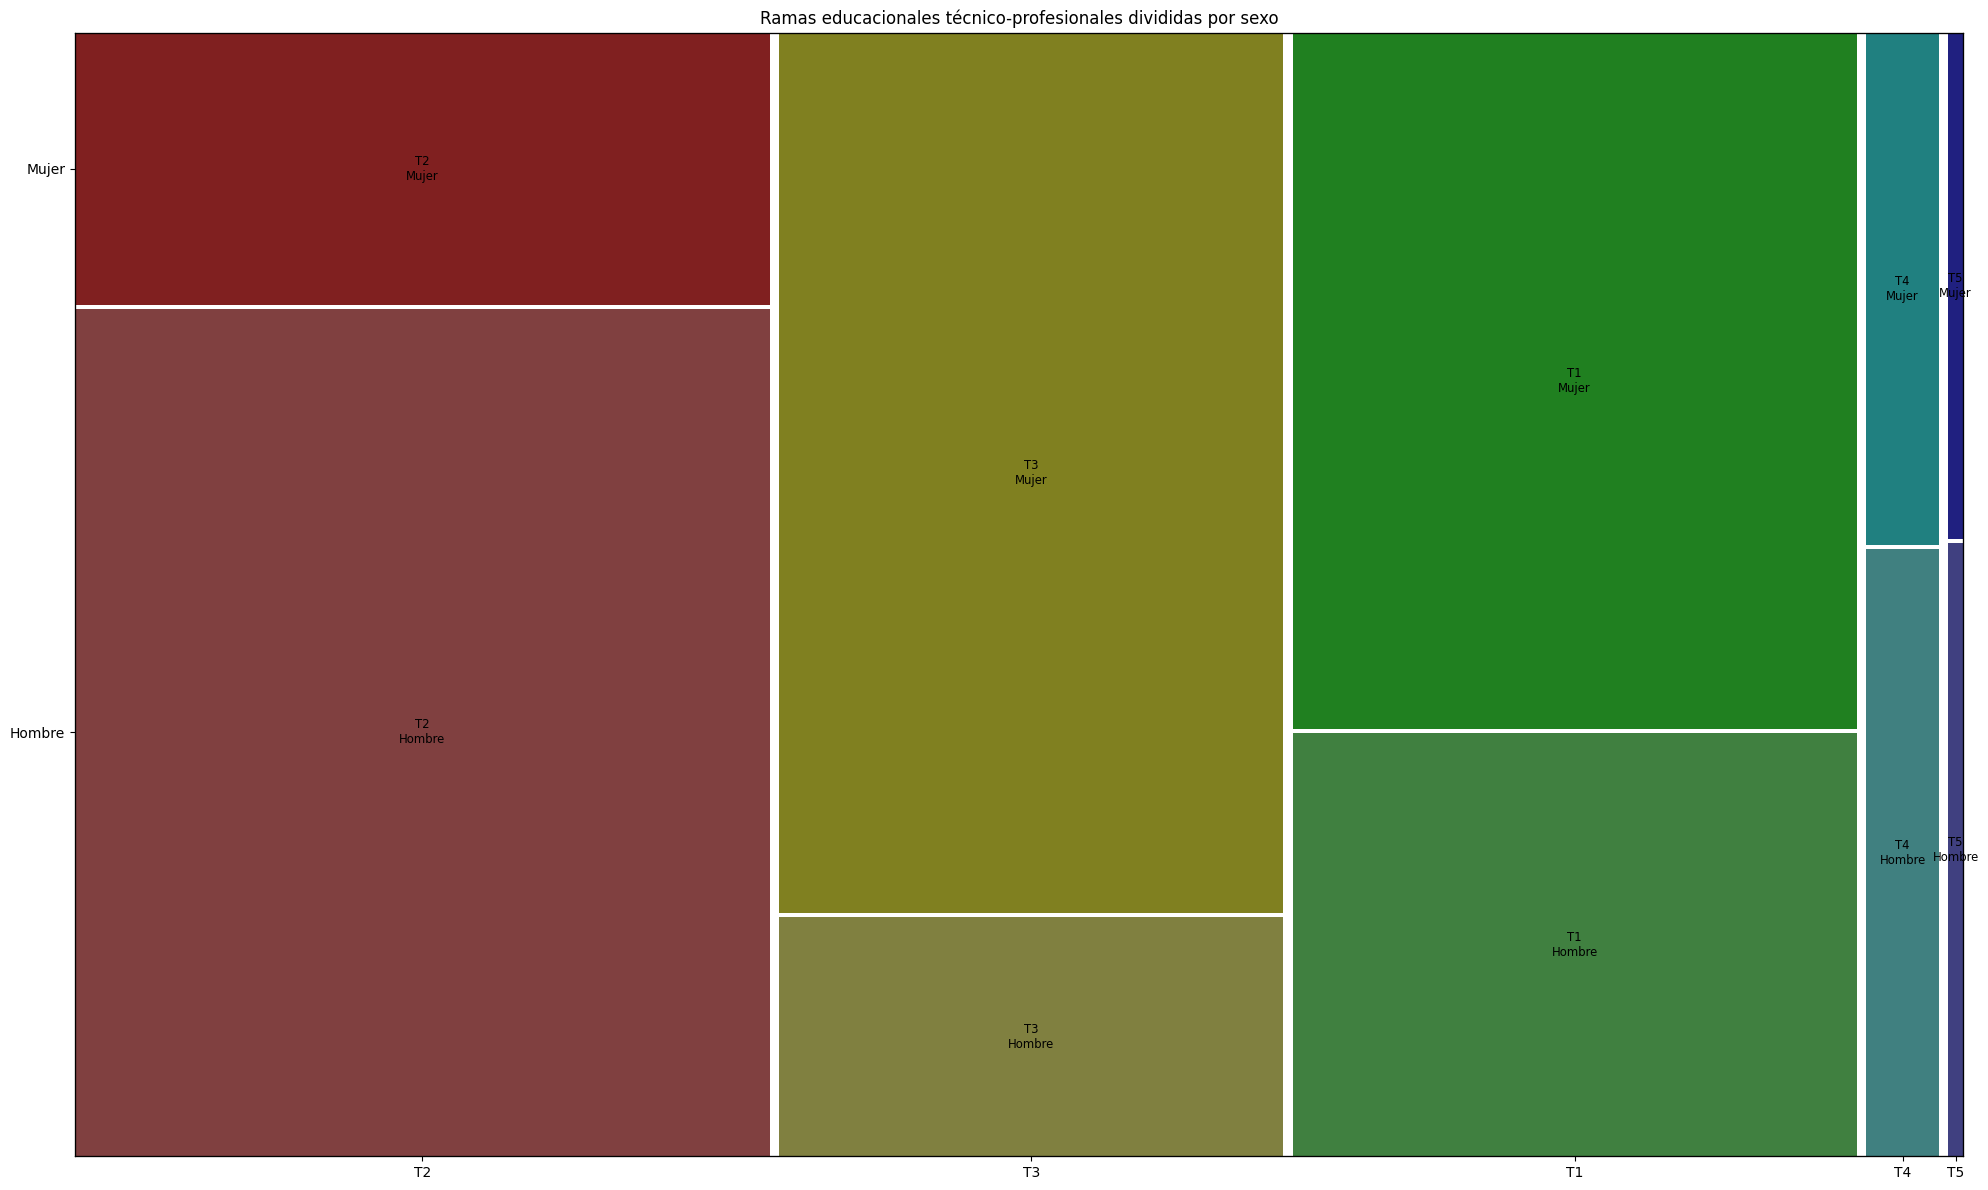

In [42]:
#Mosaico colegios técnicos
plt.rcParams["figure.figsize"] = [20.00, 12.00]
plt.rcParams["figure.autolayout"] = True
mosaic(TP_sexo, ['RAMA_EDUCACIONAL', 'SEXO'], title='Ramas educacionales técnico-profesionales divididas por sexo')
plt.show()

In [43]:
TP = (
    TP_sexo.groupby(['SEXO','COD_ENS'])
        .agg(n_inscritos=('COD_ENS', 'count'))
    ['n_inscritos'].unstack(fill_value=0)
)

TP.head()

COD_ENS,Artística Jóvenes,T-P Agrícola Adultos,T-P Agrícola Jóvenes,T-P Comercial Adultos,T-P Comercial Jóvenes,T-P Industrial Adultos,T-P Industrial Jóvenes,T-P Marítima Jóvenes,T-P Técnica Adultos,T-P Técnica Jóvenes
SEXO,,,,,,,,,,
Hombre,55,29,1655,19,9030,168,22161,333,26,4487
Mujer,62,1,1421,43,14846,16,7147,275,164,16596


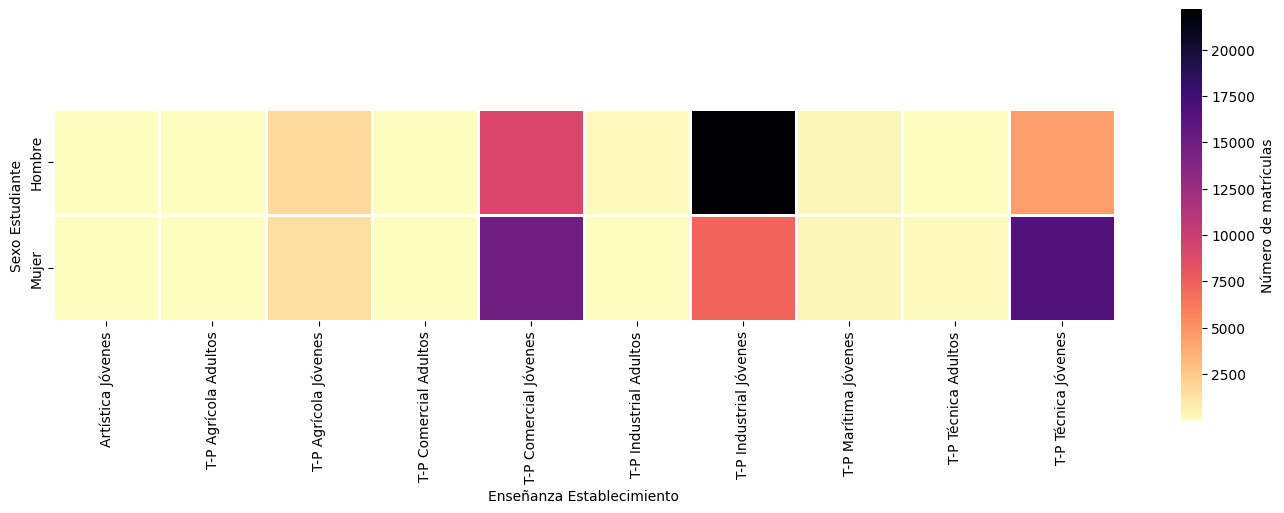

In [44]:
plt.figure(figsize=(14, 14))
sns.heatmap(TP, cmap='magma_r', square=True, linewidths=1, 
            cbar_kws={'shrink': 0.3, 'label': 'Número de matrículas'})
plt.xlabel('Enseñanza Establecimiento')
plt.ylabel('Sexo Estudiante')
plt.show()

## Gráfico seleccionado 

En este paso se modificará un heatmap que compara el porcentaje de hombres y mujeres inscritos para rendir la prueba PAES año 2024 egresados de diferentes
ramas educacionales

In [45]:
df_rama_transposed = establecimientos_sexo.transpose()

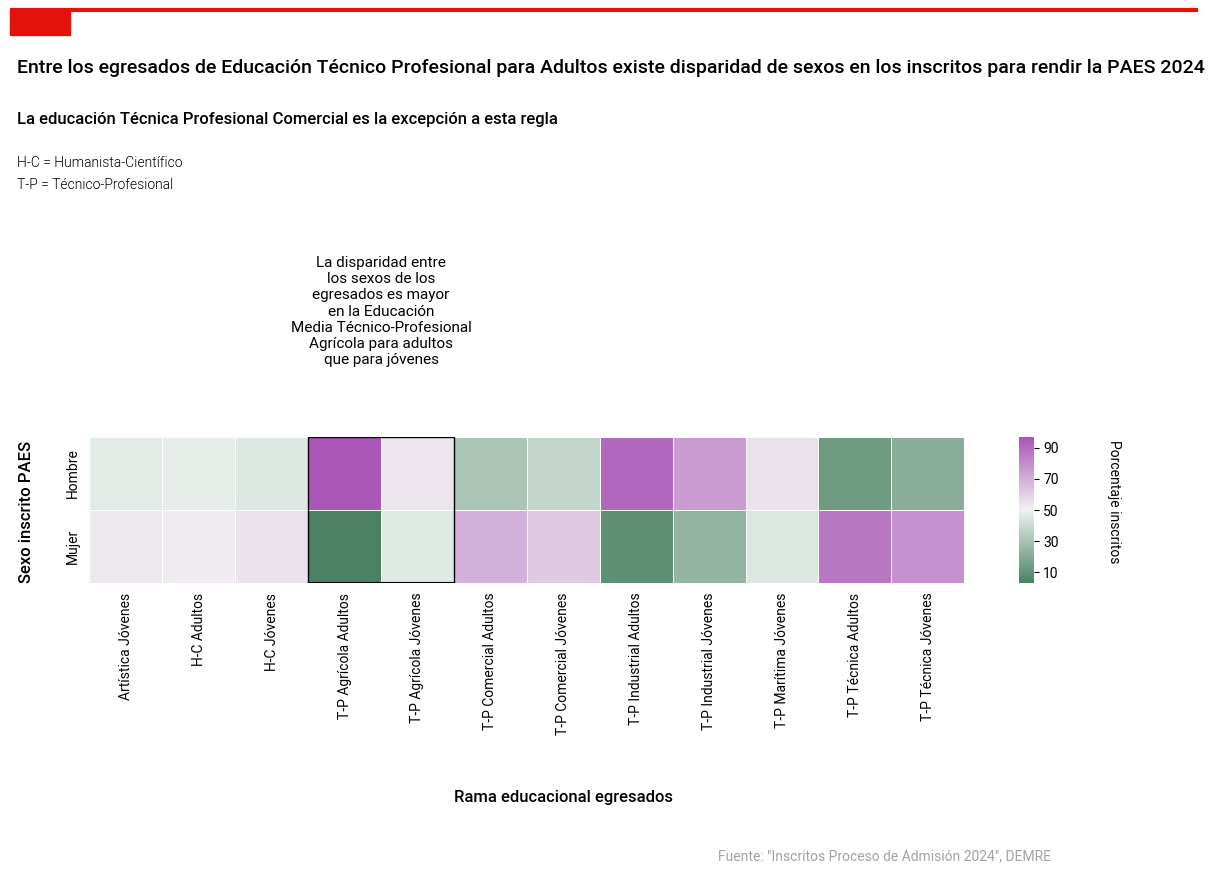

In [46]:
plt.rcParams["font.family"] = "Roboto"

fig, ax = plt.subplots(1,1, figsize=(12, 10))


my_gradient = sns.diverging_palette(145, 300, s=60, as_cmap=True)

sns.heatmap(df_rama_transposed, cmap = my_gradient, square=True, linewidths=0.5, 
            cbar_kws={'shrink': 0.15, 'location': 'right', 'aspect': 10, 'ticks': [0, 10, 30, 50, 70, 90]})


ax.text(-1, -5, "Entre los egresados de Educación Técnico Profesional para Adultos existe disparidad de sexos en los inscritos para rendir la PAES 2024", 
        fontsize=14, fontweight=600, ha='left')

ax.text(-1, -4.3, "La educación Técnica Profesional Comercial es la excepción a esta regla", 
        fontsize=12, fontweight=600, ha='left')

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("")


fig.add_artist(lines.Line2D([0.01, 1], [1, 1], lw=3, color='#e3120b', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0.01, 0.975), 0.05, 0.025, color='#e3120b'))

source = 'Fuente: "Inscritos Proceso de Admisión 2024", DEMRE'
fig.text(
    0.6, 0.15, source, color="#a2a2a2", 
    fontsize=10, fontfamily="Roboto"
)

ax.axhline(1.99, 0.25, 0.416, color = 'black', linewidth=0.8 )
ax.add_patch(Rectangle((3, 0), 2, 2, fill=None, alpha=1))

ax.text(-1,-3.7, 'H-C = Humanista-Científico', fontsize=10, fontweight=300)
ax.text(-1,-3.4, 'T-P = Técnico-Profesional', fontsize=10, fontweight=300)

ax.text(4,-1, 'La disparidad entre\nlos sexos de los\negresados es mayor\nen la Educación\nMedia Técnico-Profesional\nAgrícola para adultos\nque para jóvenes', fontsize=11, fontweight=400, 
        horizontalalignment='center',)

ax.text(5, 5, "Rama educacional egresados", 
        fontsize=12, fontweight=600, ha='left')


plt.text(14, 0.04, 'Porcentaje inscritos', color = 'black', rotation = 90, rotation_mode = 'anchor', transform_rotates_text = True)

plt.text(-0.8, 2, 'Sexo inscrito PAES', color = 'black', rotation = 270, rotation_mode = 'anchor', fontsize=12, fontweight=600, transform_rotates_text = True)


plt.show()

### Conclusiones

Los estudiantes inscritos para rendir la prueba PAES 2024 egresaron de las ramas educacionales Humanista-Científico, Artística y Técnico-Profesional. Los datos fueron normalizados para comparar las disparidades de sexo para cada rama educacional, debido a que la gran mayoría de los estudiantes registrados egresaron de la Enseñanza Media Humanista-Científico para jóvenes. 

En el caso del porcentaje de estudiantes de Enseñanza Media provenientes de establecimientos Humanista-Científico para jóvenes y adultos, y de establecimientos de la rama educacional Artística, el porcentaje de mujeres anotadas es ligeramente mayor. 

Una situación análoga se observa en los porcentajes de alumnos procedentes de instuciones Técnico-Profesionales Agrícola para jóvenes y Marítima para jóvenes. Es este caso el porcentaje de hombres inscritos es ligeramente mayor al de mujeres.

En el caso de la educación Técnico-Profesional Agrícola para adultos un 97% de los inscritos son hombres. Debido a lo pequeño de la muestra de estudiantes registrados pertenecientes a esta rama específica (veintinueve hombres y una mujer), sería recomendable analizar los datos de años anteriores para corroborar si esta tendencia ocurrió exclusivamente en esta generación o si se repite en el tiempo.

Al analizar los porcentajes de estudiantes inscritos pertenecientes a establecimientos Técnico-Profesionales Comercial y Técnica, la mayoría corresponde a mujeres. La disparidad es más acentuada en el caso de la rama Técnica, en la cual 79% de los estudiantes anotados procedentes de establecimientos para jóvenes y 86% de estudiantes registrados provenientes de instituciones para adultos son mujeres. 

La situación inversa se observa en la rama Técnico-Profesional Industrial. El porcentaje hombres registrados provenientes de los establecimientos para jóvenes corresponde a un 76%, mostrando una tendencia aún más marcada en los establecimientos para adultos, con un total de 91% de alumnos.

Luego de revisar los datos representados en el mapa de calor, los patrones dispares observados en el caso de los estudiantes provenientes de establecimientos técnico-profesionales podrían ser explicados al considerar las carreras ofrecidas por cada tipo de liceos técnico-profesionales. 

De acuerdo a la información entregada por la **Red Educación Técnica Choapa**, en el año 2021 el porcentaje de mujeres matriculadas en liceos técnico-profesionales industriales era sólo de un 19%. En el caso de la matrícula total de estudiantes de liceos técnicos-profesionales el 47% corresponde a mujeres.

Los datos presentados en el **seminario online realizado por Somos Choapa, titulado ¿Qué educación técnica necesita el país?**, los cuales están basados en información proveniente del Ministerio de Educación (2019), la expositora sostiene que los sectores técnico-profesionales altamente feminizados corresponden a **Hotelería y Turismo**, **Educación y Salud**, y **Alimentación**, los cuales se encuentran asociados a servicios personales. Sin embargo, en el seminario transmitido por Somos Choapa, la lámina de su presentación que presenta estos datos no remarca que el sector **Confección** es una de las especialidades femeninas. De hecho el gráfico de barras presentado en dicha lámina implica que la matrícula de dicho sector técnico-profesional está constituida en su totalidad por mujeres. Tampoco recalca la matrícula de los sectores **Químico** y **Administración y Comercial**, en la cual se puede comprobar una mayor proporción de mujeres. 

De acuerdo al este gráfico de barras exhibido en el seminario anteriormente mencionado, los sectores técnico-profesionales altamente masculinizados son **Tecnología y Telecomunicaciones**, **Minero**, **Electricidad y Electrónica**, **Metalmecánica**, y **Construcción**, mientras que también se observa una mayor proporción de hombres matriculados en el sector **Agropecuario**.

Los sectores **Marítimo**, **Maderero**, y **Gráfico** no presentarían un sesgo por sexo en sus porcentajes de estudiantes matriculados.

Al intentar correlacionar estos sectores con las ramas educacionales técnico-profesionales mostradas en el mapa de calor de inscritos PAES 2024, no es posible afirmar con certeza qué especialidades son impartidas en los establecimientos educacionales industriales y técnicos, debido a que no fue posible encontrar esta información en la página web del Ministerio de Educación. En la noticia publicada por Escuela Inclusiva se menciona que la rama técnico-profesional industrial incluye las especialidades mecánica, electricidad y tecnologías de la información, pero esta fuente no es oficial. Por lo tanto, no es posible llegar a una conclusión definitiva respecto a las razones que explicarían los sesgos observados respecto a los inscritos pertenecientes a estas ramas educacionales en el mapa de calor.



**Fuentes:**

- Escuela Inclusiva (2021). "Tú no deberías estar acá”: Los desafíos y la brecha de género que persisten en la educación técnico profesional". Disponible en: https://www.escuelainclusiva.cl/tu-no-deberias-estar-aca-los-desafios-y-la-brecha-de-genero-que-persisten-en-la-educacion-tecnico-profesional/
- Somos Choapa (2021). "Seminario ¿Qué educación técnica necesita el país?". Disponible en: https://www.youtube.com/watch?v=jVkkazFnhPU
- Ministerio de Educación (2015). "Bases Curriculares, Planes y Programas de Estudio Formación Diferenciada Técnico-Profesional". Disponible en: https://media.mineduc.cl/wp-content/uploads/sites/28/2016/04/Cartilla-Curricular-EMTP-1.pdf

